# Описание проекта: Прогнозирование оттока телеком компании #

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.  
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:  
* Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);  
* Выделенная линия технической поддержки (TechSupport);  
* Облачное хранилище файлов для резервного копирования данных (OnlineBackup);  
* Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:  

**contract_new.csv — информация о договоре**  
● BeginDate – дата начала пользования услугами,  
● EndDate – дата окончания пользования услугами  
● Type – тип оплаты: ежемесячный, годовой и тд,  
● PaperlessBilling – электронный платёжный документ,  
● PaymentMethod – способ оплаты,  
● MonthlyCharges – ежемесячные траты на услуги по договору,  
● TotalCharges – всего потрачено денег на услуги,  

**personal_new.csv — персональные данные клиента**  
● gender - пол,  	
● Dependents – наличие иждевенцев,  
● Senior Citizen – наличие пенсионного статуса по возрасту,  
● Partner – наличие супруга(и), 

**internet_new.csv — информация об интернет-услугах**  
● InternetService - вид интернет-подключения: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic),    
● OnlineSecurity - интернет-безопасность: блокировка небезопасных сайтов,   
● OnlineBackup - облачное хранилище файлов для резервного копирования данных,   
● DeviceProtection - интернет-безопасность: антивирус,   
● TechSupport - выделенная линия технической поддержки,	   
● StreamingTV - стриминговое телевидение,    
● StreamingMovies - каталог фильмов   

**phone_new.csv — информация об услугах телефонии**  
● MultipleLines – наличие возможности ведения параллельных линий во время звонка.

Во всех файлах столбец customerID содержит код клиента.  
Информация о договорах актуальна на **1 февраля 2020г.**

Работаем с 4 таблицами:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

## План работы и разведывательный анализ данных (EDA):    

Формируем цель:  

Для оператора связи «Ниединогоразрыва.ком» подобрать прототип модели машинного обучения для прогнозирования оттока клиентов. Так как предполагается, что удержать имеющегося клиента гораздо дешевле, чем привлечь нового клиента. Таким образом мы поможем заказчику решить проблему оттока клиентов и оптимизировать процесс.   

Формируем задачи:  
1. Загружаем и исследуем данные (обзор размера набора данных, типов переменных, наличия пропущенных значений, дубликатов).  
2. Расследуем, как устроены наши данные, как они взаимосвязаны и что они нам могут рассказать.  
3. Находим аномалии данных, которые могут исказить наши выводы, и можем предпринять меры для их коррекции.  
4. Создаём новые признаки, целевой признак.  
5. Выполняем отбор признаков при необходимости. 
6. Оцениваем и комментируем дисбаланс классов.  
7. Исследуем корреляцию признаков. 
8. Готовим итоговую таблицу, объединяем данные.  
9. Анализируем распределение признаков.  
10. Проводим масштабирование или преобразования переменных, чтобы обеспечить их качественную и интерпретируемую структуру.  
11. Исследуем модели - не менее двух разных алгоритмов.  
12. Подбираем гиперпараметры, оцениваем модели на кросс-валидации.  
13. Выбираем одну лучшую модель, оцениваем её на тестовой выборке.  
14. Анализ и интерпретация важности признаков.  
15. Анализ и интерпретация матрицы ошибок.  
16. Проводим анализ проделанной работы, пробуем произвести попытки сделать проект лучше.  
17. Готовим отчет для заказчика.  

## Подключаем нужные библиотеки 

In [172]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [173]:
!pip install category_encoders

In [174]:
!pip install numpy==1.22

In [175]:
!pip install shap

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE = 110923
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from category_encoders.m_estimate import MEstimateEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import time
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix
from sklearn import metrics
import shap

In [177]:
%%capture
import sys
!"{sys.executable}" -m pip install phik
import phik

In [178]:
!pip install category_encoders
import category_encoders as ce

In [179]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


#### Загружаем данные

In [180]:
data_contract = pd.read_csv('/datasets/contract_new.csv') # информация о договорах;
data_personal = pd.read_csv('/datasets/personal_new.csv') # персональные данные клиентов;
data_internet = pd.read_csv('/datasets/internet_new.csv') # информация об интернет-услугах;
data_phone = pd.read_csv('/datasets/phone_new.csv') # информация об услугах телефонии.

***1.1. Рассмотрим информацию о договорах.***

Выведем первые 10 строк датафрейма о договорах.

In [181]:
data_contract.head(10) 

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


Выведем основную информацию о датафрейме.

In [182]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Датасет изначально имеет 7043 строк, 8 колонок, объем памяти - 440.3 KB.  
Также обращаем внимание на то, что в столбце "TotalCharges" числовые значения имеют формат "object".

Выведем количество пропущенных значений для каждого столбца.

In [183]:
data_contract.isna().sum()

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Пропущенных значений в датасете нет.

Проверка наличие явных дубликатов.

In [184]:
print('Количество явных дубликатов:', data_contract.duplicated().sum())

Количество явных дубликатов: 0


Определим крайние даты заключения договоров.

In [185]:
print('Дата начала датасета: ', min(data_contract['BeginDate']))
print('Дата конца датасета: ', max(data_contract['BeginDate']))

Дата начала датасета:  2013-10-01
Дата конца датасета:  2020-02-01


Сохраним изначальную версию датасета без изменений. Работать будем с копией датасета.

In [186]:
data_contract_copy = data_contract.copy()

Выделим целевой признак: "client_left" (клиент ушел).

Создадим целевой признак "client_left" (клиент ушел) по столбцу "EndDate",  значение "0" - не ушел, значение "1" - ушел, используя метод .map() и lambda-функцию.

In [187]:
data_contract_copy['client_left'] = data_contract_copy['EndDate'].map(lambda x: '0' if x == 'No' else '1')
data_contract_copy.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,client_left
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,0
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96,0
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,0
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48,0
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68,0
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35,1


Выведем основную информацию о датафрейме.

In [188]:
data_contract_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   client_left       7043 non-null   object 
dtypes: float64(1), object(8)
memory usage: 495.3+ KB


Построим гистограмму распределения клиентов (оставшиеся - 0, ушедшие - 1).

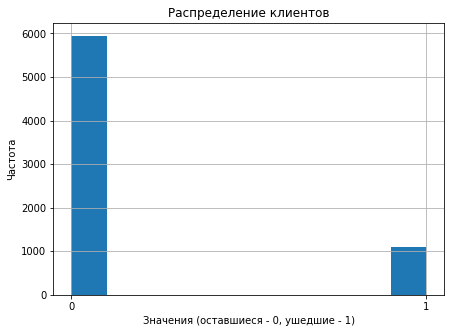

In [189]:
plt.figure(figsize = (12,6))
data_contract_copy['client_left'].hist(figsize=(7,5))
plt.title('Распределение клиентов')
plt.xlabel('Значения (оставшиеся - 0, ушедшие - 1)')
plt.ylabel('Частота');

Из гистограммы видим, что больше всего клиентов, которые остались обслуживаться у заказчика. Наблюдаем сильный дисбаланс классов.

Посчитаем количественное соотношение ушедших и оставшихся клиентов, предварительно поменяв тип данных в столбце "client_left" на int8.

In [190]:
data_contract_copy['client_left'] = data_contract_copy['client_left'].astype('int8')
print('Строк со значением "client_left" = 0 (клиент остался):', data_contract_copy.query('client_left == 0')['client_left'].count())
print('Строк со значением "client_left" = 1 (клиент ушел):', data_contract_copy.query('client_left == 1')['client_left'].count())

Строк со значением "client_left" = 0 (клиент остался): 5942
Строк со значением "client_left" = 1 (клиент ушел): 1101


Посчитаем процентное соотношение ушедших и оставшихся клиентов

In [191]:
gr_0 = data_contract_copy['client_left'] == 0
gr_1 = data_contract_copy['client_left'] == 1
print(f'''Доля оставшихся клиентов: {gr_0.mean():.2%}, Доля ушедших клиентов: {gr_1.mean():.2%}''')

Доля оставшихся клиентов: 84.37%, Доля ушедших клиентов: 15.63%


**Количественное и процентное соотношение дисбаланса классов в целевом признаке:** 
* Клиент остался - 84.37%, количество - 5942, 
* Клиент ушел - 15.63%, количество - 1101.

Заменим слово "No" в столбце "EndDate" на дату 01 февраля 2020 года (актуальная дата известна по условию задачи и по максимальной дате из датасета).

In [192]:
data_contract_copy['EndDate'] = data_contract_copy['EndDate'].str.replace('No','2020-02-01')

Поменяем тип данных в столбцах "BeginDate" и "EndDate" в datetime.

In [193]:
data_contract_copy['BeginDate'] = pd.to_datetime(data_contract_copy['BeginDate'],format='%Y-%m-%dT%H:%M:%S')
data_contract_copy['EndDate'] = pd.to_datetime(data_contract_copy['EndDate'],format='%Y-%m-%dT%H:%M:%S')

Выделим новый признак: период в днях, когда клиент пользовался услугами заказчика на момент 01 февраля 2020 года.

Выделим новый признак "period".

In [194]:
data_contract_copy['period'] = (data_contract_copy['EndDate'] - data_contract_copy['BeginDate']).dt.days

Удалим признаки "BeginDate и "EndDate" с целью избежать утечки данных при обучении модели в будущем.

In [195]:
data_contract_copy = data_contract_copy.drop(['BeginDate', 'EndDate'], axis=1)

Поменяем тип данных в столбце "TotalCharges" на float64.

In [196]:
data_contract_copy['TotalCharges'] = pd.to_numeric(data_contract_copy['TotalCharges'], errors='coerce')

Выведем первые 3 строки датафрейма о договорах после изменений.

In [197]:
data_contract_copy.head(3)

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,client_left,period
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123


Выведем основную информацию о датафрейме после измений.

In [198]:
data_contract_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Type              7043 non-null   object 
 2   PaperlessBilling  7043 non-null   object 
 3   PaymentMethod     7043 non-null   object 
 4   MonthlyCharges    7043 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   client_left       7043 non-null   int8   
 7   period            7043 non-null   int64  
dtypes: float64(2), int64(1), int8(1), object(4)
memory usage: 392.2+ KB


**Обращаем внимание на то, что после преобразования значений в признаке "TotalCharges" на тип "float64" оказалось не 7043 значений, а только 7032.**

Выведем количество пропущенных значений в столбце "TotalCharges".

In [199]:
data_contract_copy['TotalCharges'].isna().sum() 

11

Выведем 11 строк с пропущенными значениями в столбце "TotalCharges".

In [200]:
df_missed_total = data_contract_copy[data_contract_copy.isnull().any(axis=1)]
df_missed_total

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,client_left,period
488,4472-LVYGI,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0
753,3115-CZMZD,Two year,No,Mailed check,20.25,NaN,0,0
936,5709-LVOEQ,Two year,No,Mailed check,80.85,NaN,0,0
1082,4367-NUYAO,Two year,No,Mailed check,25.75,NaN,0,0
1340,1371-DWPAZ,Two year,No,Credit card (automatic),56.05,NaN,0,0
3331,7644-OMVMY,Two year,No,Mailed check,19.85,NaN,0,0
3826,3213-VVOLG,Two year,No,Mailed check,25.35,NaN,0,0
4380,2520-SGTTA,Two year,No,Mailed check,20.00,NaN,0,0
5218,2923-ARZLG,One year,Yes,Mailed check,19.70,NaN,0,0
6670,4075-WKNIU,Two year,No,Mailed check,73.35,NaN,0,0


**В начальном датасете во всех признаках не было найдено пропущенних значений. Возможно эти 11 пропущенных значений, выявленных после обработки датасета, с типом "object" имели значения пробела или нескольких пробелов, то есть по факту не имели числовых значений.**

**Выведем 11 строк с пропущенными значениеми в столбце "TotalCharges" из начального датасета.**

In [201]:
data_contract.loc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


**Из выборки начального датасета наблюдаем следующее:**   
    - зрительно значения в признаке "TotalCharges" пустые,    
    - в признаке "BeginDate" во всех 11 строках дата указана "01 февраля 2020 года" (дата актуальности датасета).   
То есть вероятнее всего числовые значения в признаке "TotalCharges" отсутствуют ввиду того, что клиенты заключили договор с заказчиком в день выгрузки датасета.  
Логично заменить пустые значения в этих строках в признаке "TotalCharges" на ноль.

Заменим "NaN" в столбце "TotalCharges" на ноль.

In [202]:
data_contract_copy['TotalCharges'] = data_contract_copy['TotalCharges'].fillna(0)

Построим гистограмму распределения данных типов оплаты (ежемесячно, на год, на два года).

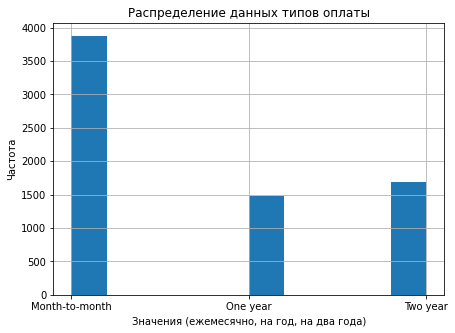

In [203]:
data_contract_copy['Type'].hist(figsize=(7,5))
plt.title('Распределение данных типов оплаты')
plt.xlabel('Значения (ежемесячно, на год, на два года)')
plt.ylabel('Частота');

Из гистограммы видим, что больше всего клиентов, которые предпочитают ежемесячный способ оплаты, реже на год или два года. Наблюдаем не большой дисбаланс классов.

Построим гистограмму распределения данных по электронному платежному документу.

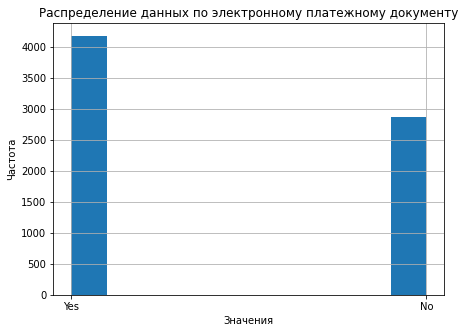

In [204]:
data_contract_copy['PaperlessBilling'].hist(figsize=(7,5))
plt.title('Распределение данных по электронному платежному документу')
plt.xlabel('Значения')
plt.ylabel('Частота');

Из гистограммы видим, что больше всего клиентов, которые предпочитают электронный платежный документ. Наблюдаем не большой дисбаланс классов.

Из гистограммы видим, что больше всего клиентов, которые предпочитают способ оплаты по электронному чеку, по сравнению с почтовым чеком, банковским переводом (автоплатеж), кредитной картой (автоплатеж). Наблюдаем не большой дисбаланс классов.

Так как в признаке "PaymentMethod" есть подпризнак в виде "автоплетеж", принимаю решение этот подпризнак выделить в отдельный признак, так как клиенты с этим статусом уверены в том, что в ближайшем времени будут пользоваться услугами заказчика, поэтому ежемесячное списание средств со счетов происходит в автоматическом режиме.

Выделяю новый признак "automatic" при помощи метода .map() и lambda-функции (1 - автоплатеж, 0 - нет автоплатежа).

In [205]:
data_contract_copy['automatic'] = data_contract_copy['PaymentMethod'].map(lambda x: '1' if x == 'Bank transfer (automatic)'\
                                                                or x == 'Credit card (automatic)' else '0')

Переименуем столбцы

In [206]:
data_contract_copy.rename(columns={'Type' : 'type'}, inplace=True)
data_contract_copy.rename(columns={'PaperlessBilling' : 'paperless_billing'}, inplace=True)
data_contract_copy.rename(columns={'PaymentMethod' : 'payment_method'}, inplace=True)
data_contract_copy.rename(columns={'MonthlyCharges' : 'monthly_charges'}, inplace=True)
data_contract_copy.rename(columns={'TotalCharges' : 'total_charges'}, inplace=True)

Построим гистограмму распределения данных клиентов со статусом "автоплатеж" (0 - нет автоплатежа, 1 - автоплатеж).

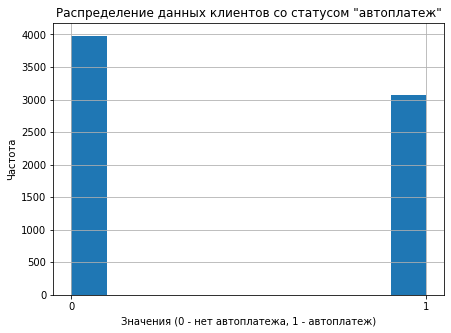

In [207]:
data_contract_copy['automatic'].hist(figsize=(7,5))
plt.title('Распределение данных клиентов со статусом "автоплатеж"')
plt.xlabel('Значения (0 - нет автоплатежа, 1 - автоплатеж)')
plt.ylabel('Частота');

Из гистограммы видим, что больше всего клиентов, которые предпочитают оплачивать без автоплатежа. Наблюдаем не большой дисбаланс классов.

Поменяем тип данных в признаках "client_left" и "automatic" на тип "object".

In [208]:
data_contract_copy['client_left'] = data_contract_copy['client_left'].astype('object')
data_contract_copy['automatic'] = data_contract_copy['automatic'].astype('object')

Выведем первые 5 строк датафрейма о договорах после изменений.

In [209]:
data_contract_copy.head()

,customerID,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,1
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,0


Выведем основную информацию о датафрейме после измений.

In [210]:
data_contract_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   client_left        7043 non-null   object 
 7   period             7043 non-null   int64  
 8   automatic          7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


**Промежуточный итог:   
Загрузили и исследовали данные в датасете "contract_new.csv" (информация о договоре).  
Датасет изначально имеет 7043 строк, 8 колонок, объем памяти - 440.3 KB. 
Сначала пропущенных значений в датасете обнаружено не было, но в процессе обработки данных в признаке "TotalCharges" оказалось не 7043 значений, а только 7032. Вероятнее всего числовые значения в признаке "TotalCharges" отсутствовали ввиду того, что клиенты заключили договор с заказчиком в день выгрузки датасета. Заменил пустые значения в этих строках в признаке "TotalCharges" на ноль.  
Дубликаты отсутствуют.  
Добавил в датасет новые признаки: "client_left" (целевой признак - клиент ушел), "period" (период в днях, когда клиент пользовался услугами заказчика на момент 01 февраля 2020 года), "automatic" (автоплатеж).  
Удалил признаки "BeginDate и "EndDate" с целью избежать утечки данных при обучении модели в будущем.  
Обнаружил сильный дисбаланс классов в целевом признаке 'client_left'.**   

***1.2. Рассмотрим персональные данные клиентов.***

 Выведем первые 5 строк датафрейма о персональных данных клиентов.

In [211]:
data_personal.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Выведем основную информацию о датафрейме

In [212]:
data_personal.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Датасет имеет 7043 строк, 5 колонок, объем памяти - 275.2 KB.

Выведем количество пропущенных значений для каждого столбца.

In [213]:
data_personal.isna().sum() 

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Проверка наличие явных дубликатов.

In [214]:
print('Количество явных дубликатов:', data_personal.duplicated().sum())

Количество явных дубликатов: 0


Пропущенных значений в датасете нет.

Выведем количество уникальных значений в признаках "gender", "SeniorCitizen", "Partner", "Dependents".

In [215]:
print(data_personal['gender'].unique())
print(data_personal['SeniorCitizen'].unique())
print(data_personal['Partner'].unique())
print(data_personal['Dependents'].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']


Построим гистограмму распределения данных пола клиентов (Female - женщины, Male - мужчины).

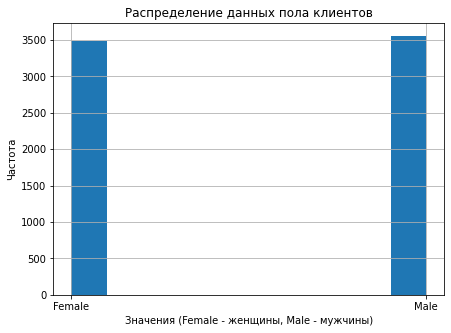

In [216]:
data_personal['gender'].hist(figsize=(7,5))
plt.title('Распределение данных пола клиентов')
plt.xlabel('Значения (Female - женщины, Male - мужчины)')
plt.ylabel('Частота');

Из гистограммы видим, что и мужчин и женщин практически одинаковое количество. Дисбаланса классов нет.

Построим гистограмму распределения данных количества клиентов пенсионного возраста (0 - не пенсионеры, 1 - пенсионеры).

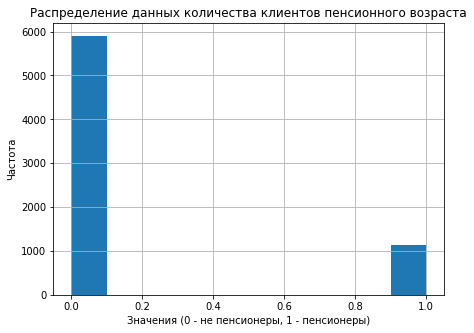

In [217]:
data_personal['SeniorCitizen'].hist(figsize=(7,5))
plt.title('Распределение данных количества клиентов пенсионного возраста')
plt.xlabel('Значения (0 - не пенсионеры, 1 - пенсионеры)')
plt.ylabel('Частота');

Из гистограммы видим, что пенсионеров небольшое количество. Наблюдаем сильный дисбаланс классов.

Построим гистограмму распределения данных количества клиентов, имеющих супруга(у).

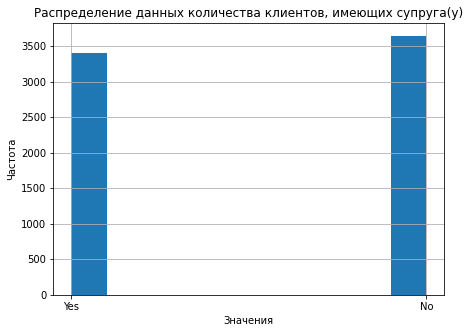

In [218]:
data_personal['Partner'].hist(figsize=(7,5))
plt.title('Распределение данных количества клиентов, имеющих супруга(у)')
plt.xlabel('Значения')
plt.ylabel('Частота');

Из гистограммы видим, что клиентов в браке и одиноких практически одинаковое количество. Дисбаланса классов нет.

Построим гистограмму распределения данных количества клиентов, имеющих иждевенцев.

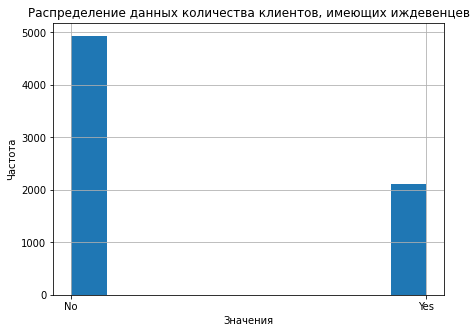

In [219]:
data_personal['Dependents'].hist(figsize=(7,5))
plt.title('Распределение данных количества клиентов, имеющих иждевенцев')
plt.xlabel('Значения')
plt.ylabel('Частота');

Из гистограммы видим, что клиентов с иждевенцами не много. Наблюдаем дисбаланс классов.

Сохраним изначальную версию датасета без изменений. Работать будем с копией датасета.

In [220]:
data_personal_copy = data_personal.copy()

Переименуем столбцы

In [221]:
data_personal_copy.rename(columns={'SeniorCitizen' : 'senior_citizen'}, inplace=True)
data_personal_copy.rename(columns={'Partner' : 'partner'}, inplace=True)
data_personal_copy.rename(columns={'Dependents' : 'dependents'}, inplace=True)

In [222]:
data_personal_copy['senior_citizen'] = data_personal_copy['senior_citizen'].astype('object')

Выведем первые 3 строки датафрейма о договорах после изменений.

In [223]:
data_personal_copy.head(3)

,customerID,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No


Выведем основную информацию о датафрейме после изменений.

In [224]:
data_personal_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


**Промежуточный итог:    
Загрузили и исследовали данные в датасете "personal_new.csv" (персональные данные клиента).     
Датасет изначально имеет 7043 строк, 5 колонок, объем памяти - 275.2 KB.    
Пропущенных значений в датасете не обнаружено.  
Дубликаты отсутствуют.  
Обнаружил дисбаланс классов в признаках 'SeniorCitizen' (клиенты пенсионного возраста) и 'Dependents' (клиенты, имеющие иждевенцев).**    

***1.3. Рассмотрим информацию об интернет-услугах.***

Выведем первые 10 строк датафрейма об интернет-услугах

In [225]:
data_internet.head(10) 

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


 Выведем основную информацию о датафрейме

In [226]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Датасет имеет 5517 строк, 8 колонок, объем памяти - 344.9 KB.

  Выведем количество пропущенных значений для каждого столбца.

In [227]:
data_internet.isna().sum()

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Прпущенных значений в датасете нет.

Проверка наличие явных дубликатов.

In [228]:
print('Количество явных дубликатов:', data_internet.duplicated().sum())

Количество явных дубликатов: 0


Выведем количество уникальных значений в признаках датасета, кроме признака "customerID".

In [229]:
print(data_internet['InternetService'].unique())
print(data_internet['OnlineSecurity'].unique())
print(data_internet['OnlineBackup'].unique())
print(data_internet['DeviceProtection'].unique())
print(data_internet['TechSupport'].unique())
print(data_internet['StreamingTV'].unique())
print(data_internet['StreamingMovies'].unique())

['DSL' 'Fiber optic']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


Построим гистограмму распределения данных типа интернет-соединения.

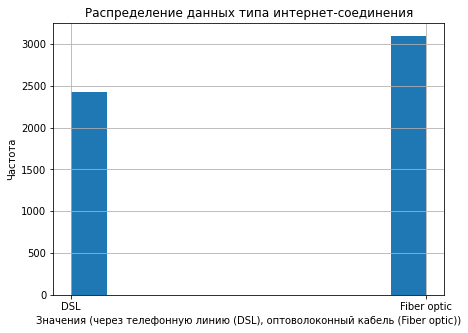

In [230]:
data_internet['InternetService'].hist(figsize=(7,5))
plt.title('Распределение данных типа интернет-соединения')
plt.xlabel('Значения (через телефонную линию (DSL), оптоволоконный кабель (Fiber optic))')
plt.ylabel('Частота');

Из гистограммы видим, что клиентов больше с оптоволоконным кабелем. Дисбаланса классов практически нет.

Сохраним изначальную версию датасета без изменений. Работать будем с копией датасета.

In [231]:
data_internet_copy = data_internet.copy()

Переименуем столбцы

In [232]:
data_internet_copy.rename(columns={'InternetService' : 'internet_service'}, inplace=True)
data_internet_copy.rename(columns={'OnlineSecurity' : 'online_security'}, inplace=True)
data_internet_copy.rename(columns={'OnlineBackup' : 'online_backup'}, inplace=True)
data_internet_copy.rename(columns={'DeviceProtection' : 'device_protection'}, inplace=True)
data_internet_copy.rename(columns={'TechSupport' : 'tech_support'}, inplace=True)
data_internet_copy.rename(columns={'StreamingTV' : 'streaming_TV'}, inplace=True)
data_internet_copy.rename(columns={'StreamingMovies' : 'streaming_movies'}, inplace=True)

Выведем первые 3 строки датафрейма о договорах после изменений.

In [233]:
data_internet_copy.head(3) 

,customerID,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No


Выведем основную информацию о датафрейме после изменений.

In [234]:
data_internet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customerID         5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_TV       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


**Промежуточный итог:   
Загрузили и исследовали данные в датасете "internet_new.csv" (информация об интернет-услугах).       
Датасет изначально имеет 5517 строк, 8 колонок, объем памяти - 344.9 KB.    
Пропущенных значений в датасете не обнаружено.  
Дубликаты отсутствуют.**

***1.4. Рассмотрим информацию об услугах телефонии.***

Выведем первые 10 строк датафрейма об услугах телефонии.

In [235]:
data_phone.head(10) 

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


Выведем основную информацию о датафрейме

In [236]:
data_phone.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Датасет имеет 6361 строк, 2 колонки, объем памяти - 99.5 KB.

Выведем количество пропущенных значений для каждого столбца.

In [237]:
data_phone.isna().sum() 

customerID       0
MultipleLines    0
dtype: int64

Пропущенных значений в датасете нет.

Проверка наличие явных дубликатов.

In [238]:
print('Количество явных дубликатов:', data_phone.duplicated().sum())

Количество явных дубликатов: 0


Построим гистограмму распределения данных по наличию возможности ведения параллельных линий во время звонка.

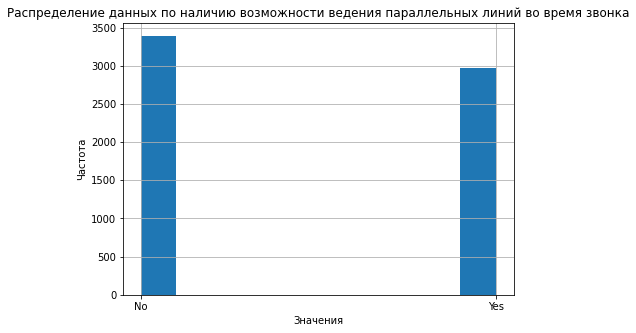

In [239]:
data_phone['MultipleLines'].hist(figsize=(7,5))
plt.title('Распределение данных по наличию возможности ведения параллельных линий во время звонка')
plt.xlabel('Значения')
plt.ylabel('Частота');

Из гистограммы видим, что количество клиентов с возможностью ведения параллельных линий немного меньше, по сравнению с клиентами, у которых такой возможности нет. Дисбаланса классов практически нет.

Переименуем столбец

In [240]:
data_phone.rename(columns={'MultipleLines' : 'multiple_lines'}, inplace=True)

Выведем первые 3 строки датафрейма о договорах после изменений.

In [241]:
data_phone.head(3) 

,customerID,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No


Выведем основную информацию о датафрейме после изменений.

In [242]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


**Промежуточный итог:     
Загрузили и исследовали данные в датасете "phone_new.csv" (информация об услугах).       
Датасет изначально имеет 6361 строк, 2 колонки, объем памяти - 99.5 KB.    
Пропущенных значений в датасете не обнаружено.  
Дубликаты отсутствуют.**

## Начнем объединять наши датасеты в один общий датасет

Методом "merge" объединим датасеты "data_contract_copy" и "data_personal_copy".

In [243]:
df_merged = pd.merge(data_contract_copy, data_personal_copy)
df_merged.head(3) 

,customerID,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Female,0,Yes,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,Male,0,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,Male,0,No,No


Далее объединим датасет "data_internet_copy".

In [244]:
df_left_merge = pd.merge(df_merged, data_internet_copy, how='left')
df_left_merge.head(3) 

,customerID,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No


На заключительном этапе объединим датасет "data_phone".

In [245]:
df_new = pd.merge(df_left_merge, data_phone, how='left')
df_new.head(3)

,customerID,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No


Выведем основную информацию об итоговом датафрейме после изменений.

In [246]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   client_left        7043 non-null   object 
 7   period             7043 non-null   int64  
 8   automatic          7043 non-null   object 
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   object 
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  internet_service   5517 non-null   object 
 14  online_security    5517 non-null   object 
 15  online_backup      5517 non-null   object 
 16  device_protection  5517 

 Выведем количество пропущенных значений для каждого столбца.

In [247]:
df_new.isna().sum()

customerID              0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
client_left             0
period                  0
automatic               0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_TV         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

In [248]:
# Заменим пропущенные значения в столбце "internet_service" на слово "no_internet"
df_new['internet_service'] = df_new['internet_service'].fillna('no_internet')
# Заменим пропущенные значения в столбце "online_security" на слово "no_internet"
df_new['online_security'] = df_new['online_security'].fillna('no_internet')
# Заменим пропущенные значения в столбце "online_backup" на слово "no_internet"
df_new['online_backup'] = df_new['online_backup'].fillna('no_internet')
# Заменим пропущенные значения в столбце "device_protection" на слово "no_internet"
df_new['device_protection'] = df_new['device_protection'].fillna('no_internet')
# Заменим пропущенные значения в столбце "tech_support" на слово "no_internet"
df_new['tech_support'] = df_new['tech_support'].fillna('no_internet')
# Заменим пропущенные значения в столбце "streaming_TV" на слово "no_internet"
df_new['streaming_TV'] = df_new['streaming_TV'].fillna('no_internet')
# Заменим пропущенные значения в столбце "streaming_movies" на слово "no_internet"
df_new['streaming_movies'] = df_new['streaming_movies'].fillna('no_internet')
# Заменим пропущенные значения в столбце "multiple_lines" на слово "no_phone"
df_new['multiple_lines'] = df_new['multiple_lines'].fillna('no_phone')

Выведем количество пропущенных значений для каждого столбца после измений.

In [249]:
df_new.isna().sum() 

customerID           0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
client_left          0
period               0
automatic            0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_TV         0
streaming_movies     0
multiple_lines       0
dtype: int64

Переименуем столбец

In [250]:
df_new.rename(columns={'customerID' : 'customer_id'}, inplace=True)

Проверка наличия явных дубликатов.

In [251]:
print('Количество явных дубликатов:', df_new.duplicated().sum())

Количество явных дубликатов: 0


Выведем первые 5 строк итогового датафрейма.

In [252]:
df_new.head() 

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic,gender,...,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,0,Female,...,Yes,No,DSL,No,Yes,No,No,No,No,no_phone
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,0,Male,...,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,0,Male,...,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,1,Male,...,No,No,DSL,Yes,No,Yes,Yes,No,No,no_phone
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,0,Female,...,No,No,Fiber optic,No,No,No,No,No,No,No


Сгенерируем корреляционную матрицу признаков (используем библиотеку "phik")

Создадим копию датафрейма df_new

In [253]:
df_new_matrix = df_new.copy()

Удалим признак "customer_id" (так как этот признак - случайный набор символов и он не должен учитываться при анализе корреляции).

In [254]:
df_new_matrix = df_new_matrix.drop(['customer_id'], axis=1)

In [255]:
df_matrix = df_new_matrix.phik_matrix(interval_cols=['monthly_charges', 'total_charges', 'period']).round(2)
df_matrix

,type,paperless_billing,payment_method,monthly_charges,total_charges,client_left,period,automatic,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_TV,streaming_movies,multiple_lines
type,1.00,0.11,0.28,0.39,0.47,0.09,0.63,0.20,0.00,0.09,0.18,0.15,0.51,0.64,0.58,0.63,0.67,0.55,0.55,0.24
paperless_billing,0.11,1.00,0.37,0.47,0.20,0.08,0.03,0.03,0.00,0.24,0.01,0.17,0.23,0.21,0.20,0.20,0.20,0.20,0.20,0.10
payment_method,0.28,0.37,1.00,0.40,0.34,0.21,0.35,1.00,0.00,0.29,0.24,0.22,0.32,0.32,0.29,0.30,0.32,0.28,0.29,0.17
monthly_charges,0.39,0.47,0.40,1.00,0.71,0.23,0.39,0.16,0.01,0.30,0.20,0.18,0.92,0.81,0.82,0.83,0.82,0.86,0.86,0.71
total_charges,0.47,0.20,0.34,0.71,1.00,0.30,0.85,0.39,0.00,0.14,0.38,0.08,0.49,0.52,0.55,0.56,0.53,0.56,0.55,0.47
client_left,0.09,0.08,0.21,0.23,0.30,1.00,0.37,0.19,0.01,0.09,0.23,0.05,0.06,0.06,0.09,0.09,0.05,0.08,0.09,0.11
period,0.63,0.03,0.35,0.39,0.85,0.37,1.00,0.48,0.00,0.06,0.45,0.20,0.06,0.35,0.37,0.37,0.35,0.31,0.31,0.35
automatic,0.20,0.03,1.00,0.16,0.39,0.19,0.48,1.00,0.00,0.05,0.25,0.14,0.04,0.11,0.10,0.11,0.12,0.05,0.05,0.07
gender,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
senior_citizen,0.09,0.24,0.29,0.30,0.14,0.09,0.06,0.05,0.00,1.00,0.02,0.32,0.16,0.13,0.11,0.11,0.14,0.11,0.11,0.09


Библиотека "phik" работает с кореляцией признаков любого типа. Она сравнивает все признаки между собой по любому типу и считает коэффициент кореляции. Так как в рассматриваемом наборе данных есть категориальные признаки, в которых значения отображены в виде чисел (в признаках "client_left"	и "automatic"), и чтобы библиотека "phik" не ошиблась в определении признаков с непрерывными переменными, мы указываем в параметре "interval_cols"  признаки 'monthly_charges', 'total_charges', 'period' (названия столбцов с интервальными непрерывными переменными).

Построение тепловой карты корреляции

<Figure size 1296x720 with 0 Axes>

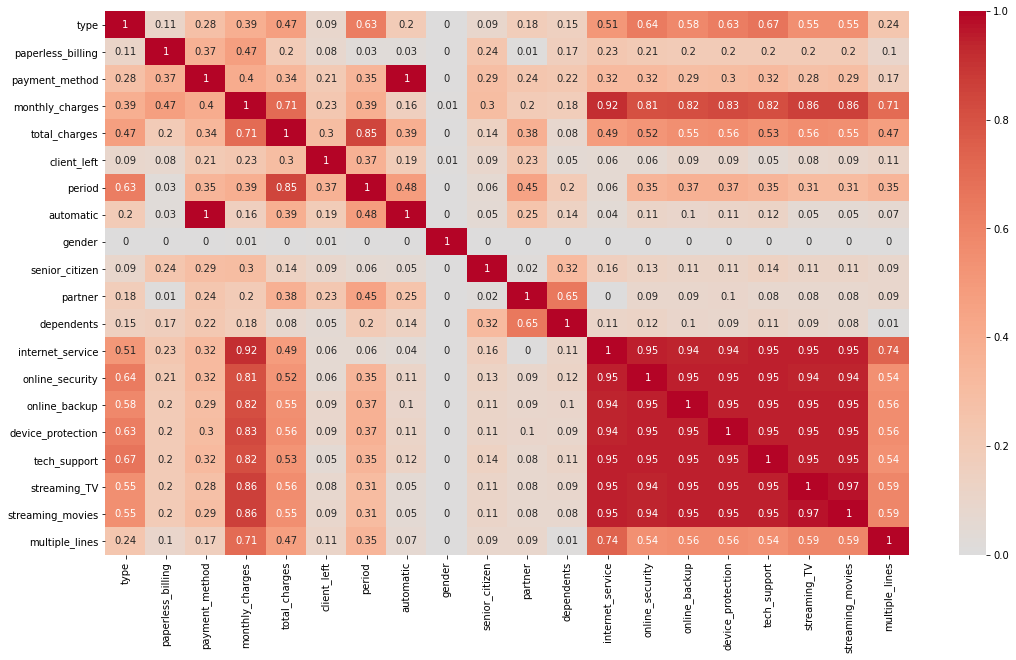

In [256]:
plt.figure(figsize = (18,10))
df_plot = sns.heatmap(df_matrix, cmap='coolwarm', center=0, annot=True)  
plt.show()

Наблюдаем сильную корреляцю признаков в следующих парах:  
1. **Значение "1": "automatic"-"payment_method"**(не удивительно, ведь я "вытянул" новый признак из признака "payment_method"),   
2. **Значение "0.85": "period" - "total_charges"** (тоже вполне логично, чем дольше пользуется клиент услугами заказчика, тем больше он тратит денег на услуги),   
3. **Значения "0.81-0.92": "monthly_charges"-"internet_service" (со вложенными услугами)** (тоже логично, чем больше интернет услуг у клиента подключено, тем больше ежемесячных трат на услуги у него по договору).        

**Удалим признаки:**  
1. **"automatic"** - я его создавал как новый признак, но оказалось он создает мультиколлинеарность с признаком "payment_method",  
2. **"internet_service" (со вложенными услугами)**, так как эти признаки в связке с целевым признаком имеют значения коллинеарности в диапазоне от 0,05 до 0,09, а у признака "monthly_charges" значение коллинеарности с целевым признаком равно 0,23 (этот признак оставляем, он больше).  
3. **"total_charges"**, так как этот признак в связке с целевым признаком имеет значение коллинеарности в размере 0,3, а у признака "period" значение коллинеарности равно 0,37 (этот признак оставляем, он больше).  

Удалим признаки 'internet_service', 'automatic', 'online_security', 'online_backup', 'device_protection', 'tech_support',
'streaming_TV', 'streaming_movies', , 'total_charges'.

In [257]:
df_new_2 = df_new_matrix.drop([ 'automatic', 'internet_service', 'online_security', 'online_backup', 'device_protection',\
                        'tech_support', 'streaming_TV', 'streaming_movies', 'total_charges'], axis=1)

Выведем основную информацию о датафрейме после изменений.

In [258]:
df_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   client_left        7043 non-null   object 
 5   period             7043 non-null   int64  
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   object 
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  multiple_lines     7043 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 660.3+ KB


Сгенерируем корреляционную матрицу признаков с измененным датасетом.

In [259]:
df_matrix_2 = df_new_2.phik_matrix(interval_cols=['monthly_charges', 'period']).round(2)
df_matrix_2

,type,paperless_billing,payment_method,monthly_charges,client_left,period,gender,senior_citizen,partner,dependents,multiple_lines
type,1.00,0.11,0.28,0.39,0.09,0.63,0.00,0.09,0.18,0.15,0.24
paperless_billing,0.11,1.00,0.37,0.47,0.08,0.03,0.00,0.24,0.01,0.17,0.10
payment_method,0.28,0.37,1.00,0.40,0.21,0.35,0.00,0.29,0.24,0.22,0.17
monthly_charges,0.39,0.47,0.40,1.00,0.23,0.39,0.01,0.30,0.20,0.18,0.71
client_left,0.09,0.08,0.21,0.23,1.00,0.37,0.01,0.09,0.23,0.05,0.11
period,0.63,0.03,0.35,0.39,0.37,1.00,0.00,0.06,0.45,0.20,0.35
gender,0.00,0.00,0.00,0.01,0.01,0.00,1.00,0.00,0.00,0.00,0.00
senior_citizen,0.09,0.24,0.29,0.30,0.09,0.06,0.00,1.00,0.02,0.32,0.09
partner,0.18,0.01,0.24,0.20,0.23,0.45,0.00,0.02,1.00,0.65,0.09
dependents,0.15,0.17,0.22,0.18,0.05,0.20,0.00,0.32,0.65,1.00,0.01


Построение тепловой карты корреляции 

<Figure size 1296x720 with 0 Axes>

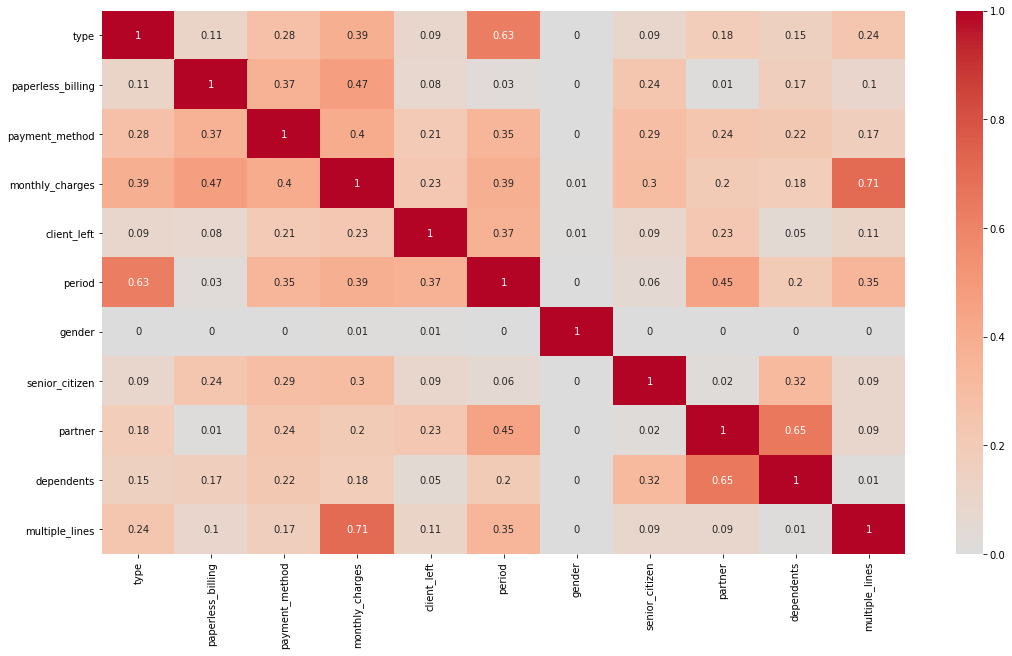

In [260]:
plt.figure(figsize = (18,10))
df_plot_2 = sns.heatmap(df_matrix_2, cmap='coolwarm', center=0, annot=True)  
plt.show()

Коэффициент кореляции между предикторами теперь не превышает значение 0,8.

**1.1. Начнем готовить данные для обучения модели "LogisticRegression" (Логистическая регрессия)**

Создадим копию датафрейма df_new_2

In [261]:
data_copy_1 = df_new_2.copy()

Приведем значения в признаке 'senior_citizen' к типу 'int8' 

In [262]:
data_copy_1['senior_citizen'] = data_copy_1['senior_citizen'].astype('int8')

Разделим признаки

In [263]:
target = data_copy_1['client_left']
features = data_copy_1.drop(['client_left'], axis=1)

In [264]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, \
                                                                            random_state=RANDOM_STATE) 

In [265]:
print(features_train.shape)
print(target_train.shape)

(5282, 10)
(5282,)


В обучающей (тренировочной) выборке 5282 строк (75% от 7043 строк).

Тестовая выборка

In [266]:
print(features_test.shape)
print(target_test.shape)

(1761, 10)
(1761,)


В тестовой выборке 1761 строк (25% от 7043 строк).

In [267]:
features_train.head(2)

,type,paperless_billing,payment_method,monthly_charges,period,gender,senior_citizen,partner,dependents,multiple_lines
2610,Month-to-month,No,Credit card (automatic),30.10,1279,Female,0,No,Yes,no_phone
2436,Month-to-month,Yes,Credit card (automatic),73.55,945,Female,1,No,No,No


Выведем количество уникальных значений в категориальных признаках

In [268]:
print(features_train['type'].unique())
print(features_train['paperless_billing'].unique())
print(features_train['payment_method'].unique())
print(features_train['gender'].unique())
print(features_train['senior_citizen'].unique())
print(features_train['partner'].unique())
print(features_train['dependents'].unique())
print(features_train['multiple_lines'].unique())

['Month-to-month' 'Two year' 'One year']
['No' 'Yes']
['Credit card (automatic)' 'Mailed check' 'Electronic check'
 'Bank transfer (automatic)']
['Female' 'Male']
[0 1]
['No' 'Yes']
['Yes' 'No']
['no_phone' 'No' 'Yes']


Определим категориальные признаки

In [269]:
category_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'multiple_lines']

Преобразую категориальные признаки при помощи техники OneHotEncoder

Cоздадим объект класса OneHotEncoder

In [270]:
onehotencoder = OneHotEncoder(sparse_output = False, handle_unknown='ignore', drop='first', dtype='int8')
features_train_cat = pd.DataFrame(onehotencoder.fit_transform(features_train[category_features]))
features_test_cat = pd.DataFrame(onehotencoder.transform(features_test[category_features]))
features_train_num = features_train.drop(category_features, axis=1)
features_test_num = features_test.drop(category_features, axis=1)

In [271]:
features_train_cat.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0


Выведем новые признаки с помощью метода .get_feature_names_out()

In [272]:
onehotencoder.get_feature_names_out()

array(['type_One year', 'type_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check',
       'gender_Male', 'partner_Yes', 'dependents_Yes',
       'multiple_lines_Yes', 'multiple_lines_no_phone'], dtype=object)

Используем вывод метода .get_feature_names_out(), чтобы добавить названия столбцов

In [273]:
features_train_cat.columns = onehotencoder.get_feature_names_out()
features_train_cat.head(3)

,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,multiple_lines_no_phone
0,0,0,0,1,0,0,0,0,1,0,1
1,0,0,1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0


In [274]:
features_test_cat.columns = onehotencoder.get_feature_names_out()
features_test_cat.head(3)

,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,multiple_lines_no_phone
0,0,1,1,1,0,0,1,1,1,1,0
1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,1,0,0,0,1,1,1,1,0


In [275]:
features_train_num.head(3)

,monthly_charges,period,senior_citizen
2610,30.10,1279,0
2436,73.55,945,1
4953,19.40,303,0


In [276]:
features_test_num.head(3)

,monthly_charges,period,senior_citizen
3535,109.20,639,0
2798,94.90,427,0
2248,54.45,914,0


Cбросим индексацию

In [277]:
features_train_num.reset_index(drop=True, inplace=True)
features_test_num.reset_index(drop=True, inplace=True)

Присоединим признаки друг к другу на всех выборках

In [278]:
features_train = features_train_num.merge(features_train_cat, left_index=True, right_index=True)
features_test = features_test_num.merge(features_test_cat, left_index=True, right_index=True)

Проведем маштабирование числовых признаков

Определим числовые признаки

In [279]:
numeric = ['monthly_charges', 'period']

In [280]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

StandardScaler()

Указал параметр handle_unknown = 'ignore', чтобы новые неизвестные значения игнорировались и не рассматривались в итоговой матрице.   
Указал параметр drop = 'first' чтобы не было мультиколлинеарности и чтобы не попасть в дамми-ловушку.

Использовал энкондер OneHotEncoder. Использовал метод .get_feature_names_out(), который возвращает название столбцов после кодирования.

Для древесных моделей использую энкондер OrdinalEncoder(), а для модели CatBoost - внутренний кодировщик (используя параметр "cat_features").

In [281]:
features_train.head(2)

,monthly_charges,period,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,multiple_lines_no_phone
0,-1.155689,0.552784,0,0,0,0,1,0,0,0,0,1,0,1
1,0.289889,0.066172,1,0,0,1,1,0,0,0,0,0,0,0


In [282]:
features_test.head(2)

,monthly_charges,period,senior_citizen,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Yes,multiple_lines_no_phone
0,1.475962,-0.379647,0,0,1,1,1,0,0,1,1,1,1,0
1,1.000202,-0.688514,0,0,0,1,0,1,0,1,0,0,0,0


Выполнил масштабирование непрерывных признаков

Cбросим индексацию

In [283]:
target_train.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

In [284]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         5282 non-null   float64
 1   period                                  5282 non-null   float64
 2   senior_citizen                          5282 non-null   int8   
 3   type_One year                           5282 non-null   int8   
 4   type_Two year                           5282 non-null   int8   
 5   paperless_billing_Yes                   5282 non-null   int8   
 6   payment_method_Credit card (automatic)  5282 non-null   int8   
 7   payment_method_Electronic check         5282 non-null   int8   
 8   payment_method_Mailed check             5282 non-null   int8   
 9   gender_Male                             5282 non-null   int8   
 10  partner_Yes                             5282 non-null   int8

In [285]:
target_train = target_train.astype('int8')
target_test = target_test.astype('int8')

Выборки готовы для работы.

**1.2. Обучим модель "LogisticRegression" (Логистическая регрессия)**

In [286]:
# инициализируем модель
model_lr = LogisticRegression(random_state = RANDOM_STATE)
# определяем словарь с набором параметров
#param_lr = {'penalty': ['l1', 'l2', 'elasticnet', None], 
#            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#             'max_iter':[50,100,200]}
# В целях улучшения быстродействия программы оставил только наулучшие значения
param_lr = {
            'penalty': ['l2'],
            'solver': ['sag'],
             'max_iter':[50]
             }
# применим GridSearchCV с кросс-валидацией
grid_lr = GridSearchCV(model_lr, param_lr, cv = 5, scoring = 'roc_auc')

Целевая метрика проекта - `AUC-ROC` не чувствительна к дисбалансу, балансировать классы или учитывать дисбаланс при работе с моделями не нужно.

Обучим модель

In [287]:
grid_lr.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=110923),
             param_grid={'max_iter': [50], 'penalty': ['l2'],
                         'solver': ['sag']},
             scoring='roc_auc')

In [288]:
print("Наилучшие гиперпараметры модели 'Логистическая регрессия':", grid_lr.best_params_)
print("У модели 'Логистическая регрессия' метрика AUC-ROC =", grid_lr.best_score_.round(3))

Наилучшие гиперпараметры модели 'Логистическая регрессия': {'max_iter': 50, 'penalty': 'l2', 'solver': 'sag'}
У модели 'Логистическая регрессия' метрика AUC-ROC = 0.744


Для `LogisticRegression` оптимизировали гиперпараметры и вывели оценку на кросс-валидации.

**2.1. Подготовим данные для обучения моделей "RandomForestClassifier" (Случайный лес) и "DecisionTreeClassifier" (Дерево решений)**

Создадим копию датафрейма df_new_2

In [289]:
data_copy_2 = df_new_2.copy()

Разделим признаки на числовые (numeric_features) и категориальные (cat_features)

In [290]:
data_copy_2.head(3)

,type,paperless_billing,payment_method,monthly_charges,client_left,period,gender,senior_citizen,partner,dependents,multiple_lines
0,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,no_phone
1,One year,No,Mailed check,56.95,0,1036,Male,0,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,0,123,Male,0,No,No,No


In [291]:
cat_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'partner', 'dependents', 'multiple_lines']

In [292]:
data_copy_2['client_left'] = data_copy_2['client_left'].astype('int8')
data_copy_2['senior_citizen'] = data_copy_2['senior_citizen'].astype('float64')

Разделим признаки

In [293]:
target = data_copy_2['client_left']
features = data_copy_2.drop(['client_left'], axis=1)

In [294]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, \
                                                                            random_state=RANDOM_STATE) 

In [295]:
features_train.head(2)

,type,paperless_billing,payment_method,monthly_charges,period,gender,senior_citizen,partner,dependents,multiple_lines
2610,Month-to-month,No,Credit card (automatic),30.10,1279,Female,0.0,No,Yes,no_phone
2436,Month-to-month,Yes,Credit card (automatic),73.55,945,Female,1.0,No,No,No


In [296]:
features_test.head(2)

,type,paperless_billing,payment_method,monthly_charges,period,gender,senior_citizen,partner,dependents,multiple_lines
3535,Two year,Yes,Credit card (automatic),109.2,639,Male,0.0,Yes,Yes,Yes
2798,Month-to-month,Yes,Electronic check,94.9,427,Male,0.0,No,No,No


Преобразую категориальные признаки при помощи техники Ordinal Encoding

Создаем объект OrdinalEncoder

In [297]:
encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan)

`OrdinalEncoder` надо настроить на бесперебойную работу при появлении новых данных, ранее неизвестных значений признаков. Поэтому для непрерывности процесса моделирования настраиваем параметр `handle_unknown='use_encoded_value'`, чтобы новые ранее неизвестные значения кодировались константным значением, а в параметр `unknown_value` передадим значение-константу "np.nan". 

Применяем OrdinalEncoder к обучающей выборке

In [298]:
features_train_categ = pd.DataFrame(encoder.fit_transform(features_train[cat_features]), \
                                    columns=features_train[cat_features].columns)
features_train_numer = features_train.drop(cat_features, axis=1)
features_train_categ.head(3)

,type,paperless_billing,payment_method,gender,partner,dependents,multiple_lines
0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2.0,0.0,3.0,0.0,0.0,0.0,0.0


In [299]:
features_train_numer.head(3)

,monthly_charges,period,senior_citizen
2610,30.10,1279,0.0
2436,73.55,945,1.0
4953,19.40,303,0.0


Применяем OrdinalEncoder к тестовой выборке

In [300]:
features_test_categ = pd.DataFrame(encoder.transform(features_test[cat_features]), columns=features_test[cat_features].columns)
features_test_numer = features_train.drop(cat_features, axis=1)
features_test_categ.head(3)

,type,paperless_billing,payment_method,gender,partner,dependents,multiple_lines
0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,2.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [301]:
features_test_numer.head(3)

,monthly_charges,period,senior_citizen
2610,30.10,1279,0.0
2436,73.55,945,1.0
4953,19.40,303,0.0


Cбросим индексацию

In [302]:
features_train_numer.reset_index(drop=True, inplace=True)
features_test_numer.reset_index(drop=True, inplace=True)

Присоединим признаки друг к другу на всех выборках

In [303]:
features_train = features_train_numer.merge(features_train_categ, left_index=True, right_index=True)
features_test = features_test_numer.merge(features_test_categ, left_index=True, right_index=True)

Проведем маштабирование числовых признаков

In [304]:
numeric_features = ['monthly_charges', 'period']

In [305]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric_features])
features_train[numeric_features] = scaler.transform(features_train[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

StandardScaler()

In [306]:
features_train.head(3)

,monthly_charges,period,senior_citizen,type,paperless_billing,payment_method,gender,partner,dependents,multiple_lines
0,-1.155689,0.552784,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,0.289889,0.066172,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.511678,-0.869173,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0


In [307]:
features_test.head(3)

,monthly_charges,period,senior_citizen,type,paperless_billing,payment_method,gender,partner,dependents,multiple_lines
0,-1.155689,0.552784,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.289889,0.066172,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
2,-1.511678,-0.869173,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


**2.2. Обучим модель "RandomForestClassifier" (Случайный лес)**

In [308]:
# инициализируем модель
forest = RandomForestClassifier(random_state=RANDOM_STATE)
# определяем словарь с набором параметров
# forest_parametrs = {
#                     'n_estimators': [300,400,500],
#                     'max_depth': range(5,16,5),
#                     'criterion': ['gini', 'entropy', 'log_loss'],
#                     'min_samples_split': range(2,7,2),
#                     'min_samples_leaf': range(18,25,3),
#                     'max_features': ['sqrt', 'log2', 'none']
#                      } 
# В целях улучшения быстродействия программы оставил только наулучшие значения гиперпараметров
forest_parametrs = {
                    'n_estimators': [400],
                    'max_depth': [10],
                     'criterion': ['entropy'],
                     'min_samples_split': [2],
                     'min_samples_leaf': [24],
                     'max_features': ['sqrt']
                   } 
# применим GridSearchCV с кросс-валидацией
model_forest_grid = GridSearchCV(forest, forest_parametrs, scoring = 'roc_auc', cv = 5)  

Обучим модель на тренировочной выборке

In [309]:
model_forest_grid.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=110923),
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'min_samples_leaf': [24],
                         'min_samples_split': [2], 'n_estimators': [400]},
             scoring='roc_auc')

In [310]:
print("Наилучшие гиперпараметры модели 'Случайный лес':", model_forest_grid.best_params_)
print("У модели 'Случайный лес' метрика AUC-ROC =", model_forest_grid.best_score_.round(3))

Наилучшие гиперпараметры модели 'Случайный лес': {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 24, 'min_samples_split': 2, 'n_estimators': 400}
У модели 'Случайный лес' метрика AUC-ROC = 0.828


Для `RandomForestClassifier` оптимизировали гиперпараметры и вывели оценку на кросс-валидации.

**2.3. Обучим модель "DecisionTreeClassifier" (Дерево решений)**

In [311]:
# инициализируем модель
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE)
# определяем словарь с набором параметров
# param_dtc = {'criterion': ['gini', 'entropy', 'log_loss'],
#                'max_depth': range(2, 15, 3),#             
#             'min_samples_split': [3, 4, 5],        
#             'min_samples_leaf': [1,2]}
# В целях улучшения быстродействия программы оставил только наулучшие значения
param_dtc = {
            'criterion':['entropy'],
             'max_depth': [5],
             'min_samples_split': [5],          
             'min_samples_leaf': [1],
              }
# применим GridSearchCV с кросс-валидацией
model_dtc = GridSearchCV(estimator = dtc, param_grid = param_dtc, cv = 5, verbose = 2, scoring= 'roc_auc',  n_jobs = -1)

Обучим модель на тренировочной выборке

In [312]:
model_dtc.fit(features_train, target_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110923),
             n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5],
                         'min_samples_leaf': [1], 'min_samples_split': [5]},
             scoring='roc_auc', verbose=2)

In [313]:
print("Наилучшие гиперпараметры модели 'Дерево решений':", model_dtc.best_params_)
print("У модели 'Дерево решений' метрика AUC-ROC =", model_dtc.best_score_.round(3))

Наилучшие гиперпараметры модели 'Дерево решений': {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
У модели 'Дерево решений' метрика AUC-ROC = 0.795


Для `DecisionTreeClassifier` оптимизировали гиперпараметры и вывели оценку на кросс-валидации.

**3.1. Подготовим данные для обучения модели градиентного бустинга "CatBoostClassifier"**

Так как эта модель умеет работать с категориальными признаками, подготовим данные без кодировки категориальных признаков.

Создадим копию датафрейма df_new_2

In [314]:
data_copy_3 = df_new_2.copy()

In [315]:
data_copy_3.head(3)

,type,paperless_billing,payment_method,monthly_charges,client_left,period,gender,senior_citizen,partner,dependents,multiple_lines
0,Month-to-month,Yes,Electronic check,29.85,0,31,Female,0,Yes,No,no_phone
1,One year,No,Mailed check,56.95,0,1036,Male,0,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,0,123,Male,0,No,No,No


In [316]:
data_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   client_left        7043 non-null   object 
 5   period             7043 non-null   int64  
 6   gender             7043 non-null   object 
 7   senior_citizen     7043 non-null   object 
 8   partner            7043 non-null   object 
 9   dependents         7043 non-null   object 
 10  multiple_lines     7043 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 660.3+ KB


Разделим признаки на числовые (numeric_features) и категориальные (cat_features)

In [317]:
numeric_features = ['monthly_charges', 'period']

In [318]:
cat_features = ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', \
                     'multiple_lines']

Приведем категориальные признаки к формату category

In [319]:
data_copy_3[cat_features] = data_copy_3[cat_features].astype('category')

In [320]:
data_copy_3['client_left'] = data_copy_3['client_left'].astype('int8')

In [321]:
data_copy_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   type               7043 non-null   category
 1   paperless_billing  7043 non-null   category
 2   payment_method     7043 non-null   category
 3   monthly_charges    7043 non-null   float64 
 4   client_left        7043 non-null   int8    
 5   period             7043 non-null   int64   
 6   gender             7043 non-null   category
 7   senior_citizen     7043 non-null   category
 8   partner            7043 non-null   category
 9   dependents         7043 non-null   category
 10  multiple_lines     7043 non-null   category
dtypes: category(8), float64(1), int64(1), int8(1)
memory usage: 228.0 KB


Разделим признаки

In [322]:
target = data_copy_3['client_left']
features = data_copy_3.drop(['client_left'], axis=1)

In [323]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, \
                                                                            random_state=RANDOM_STATE) 

Проведем маштабирование числовых признаков

In [324]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric_features])
features_train[numeric_features] = scaler.transform(features_train[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

StandardScaler()

Cбросим индексацию

In [325]:
features_train.reset_index(drop=True, inplace=True)
features_test.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

In [326]:
features_train.head(3)

,type,paperless_billing,payment_method,monthly_charges,period,gender,senior_citizen,partner,dependents,multiple_lines
0,Month-to-month,No,Credit card (automatic),-1.155689,0.552784,Female,0,No,Yes,no_phone
1,Month-to-month,Yes,Credit card (automatic),0.289889,0.066172,Female,1,No,No,No
2,Two year,No,Mailed check,-1.511678,-0.869173,Female,0,No,No,No


In [327]:
features_test.head(3)

,type,paperless_billing,payment_method,monthly_charges,period,gender,senior_citizen,partner,dependents,multiple_lines
0,Two year,Yes,Credit card (automatic),1.475962,-0.379647,Male,0,Yes,Yes,Yes
1,Month-to-month,Yes,Electronic check,1.000202,-0.688514,Male,0,No,No,No
2,Month-to-month,Yes,Bank transfer (automatic),-0.345567,0.021007,Male,0,Yes,Yes,Yes


**3.2. Обучим модель градиентного бустинга "CatBoostClassifier"**

In [328]:
# инициализируем модель
cbc = CatBoostClassifier(random_state = RANDOM_STATE)
# определяем словарь с набором параметров
# param_cbc = { 'iterations': [800, 1000],
#                'max_depth': range(1,7,2),
#                 'learning_rate': [0.1,0.2,0.3] }
# В целях улучшения быстродействия программы оставил только наулучшие значения гиперпараметров
param_cbc = {'iterations': [1000],            
          'max_depth': [3],
         'learning_rate': [0.2] } 
# применим GridSearchCV с кросс-валидацией
model_cbc = GridSearchCV(estimator = cbc, param_grid = param_cbc, scoring= 'roc_auc', cv = 5, verbose = 3)

Обучим модель на тренировочной выборке

In [329]:
model_cbc.fit(features_train, target_train, cat_features=cat_features)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
0:	learn: 0.5560919	total: 4.81ms	remaining: 4.81s
1:	learn: 0.4899488	total: 8.64ms	remaining: 4.31s
2:	learn: 0.4473512	total: 12.5ms	remaining: 4.14s
3:	learn: 0.4204832	total: 16.7ms	remaining: 4.16s
4:	learn: 0.3962176	total: 20.6ms	remaining: 4.1s
5:	learn: 0.3800574	total: 24.2ms	remaining: 4.01s
6:	learn: 0.3688648	total: 27.6ms	remaining: 3.92s
7:	learn: 0.3588205	total: 31ms	remaining: 3.84s
8:	learn: 0.3554024	total: 34.5ms	remaining: 3.8s
9:	learn: 0.3502306	total: 37.7ms	remaining: 3.73s
10:	learn: 0.3449414	total: 41ms	remaining: 3.69s
11:	learn: 0.3412090	total: 43.8ms	remaining: 3.61s
12:	learn: 0.3365721	total: 47.5ms	remaining: 3.61s
13:	learn: 0.3339337	total: 50.7ms	remaining: 3.57s
14:	learn: 0.3310147	total: 54.1ms	remaining: 3.55s
15:	learn: 0.3287806	total: 57.7ms	remaining: 3.55s
16:	learn: 0.3278872	total: 61.1ms	remaining: 3.53s
17:	learn: 0.3265503	total: 64.4ms	remaining: 3.51s
18:	learn: 0.3259356	

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f53091059a0>,
             param_grid={'iterations': [1000], 'learning_rate': [0.2],
                         'max_depth': [3]},
             scoring='roc_auc', verbose=3)

In [330]:
print("Наилучшие гиперпараметры  модели градиентного бустинга 'CatBoostClassifier':", model_cbc.best_params_)
print("У  модели градиентного бустинга 'CatBoostClassifier' метрика AUC-ROC =", model_cbc.best_score_.round(3))

Наилучшие гиперпараметры  модели градиентного бустинга 'CatBoostClassifier': {'iterations': 1000, 'learning_rate': 0.2, 'max_depth': 3}
У  модели градиентного бустинга 'CatBoostClassifier' метрика AUC-ROC = 0.927


Для `CatBoostClassifier` оптимизировали гиперпараметры и вывели оценку на кросс-валидации.

**Проверим модель на тестовой выборке**

Измерим значение AUC-ROC
Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area
Under Curve ROC, «площадь под ROC-кривой»).
Это новая метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.

Получим предсказания модели на тестовой выборке

In [331]:
predictions_test = model_cbc.predict_proba(features_test)
predictions = predictions_test[:, 1]
auc_roc = roc_auc_score(target_test, predictions)
print("На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика AUC-ROC =", auc_roc)

На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика AUC-ROC = 0.9354587239074256


Посчитаем метрику Accuracy

In [332]:
predictions_test_2 = model_cbc.predict(features_test) # получим предсказания модели
score = accuracy_score(target_test, predictions_test_2) # посчитаем качество модели
print("На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика Accuracy =", score)

На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика Accuracy = 0.9363997728563316


**Составим сводную таблицу полученных результатов обучения моделей**

In [333]:
df_simple = [[grid_lr.best_score_.round(3)],
        [model_forest_grid.best_score_.round(3)],
        [model_dtc.best_score_.round(3)],
        [model_cbc.best_score_.round(3)]]
model_simple = ["Модель 'LogisticRegression' (Логистическая регрессия)" , "Модель 'RandomForestClassifier' (Случайный лес)",\
                  "Модель 'DecisionTreeClassifier' (Дерево решений)", "Модель градиентного бустинга 'CatBoostClassifier'", ]
pd.DataFrame(data = df_simple, index = model_simple, columns = ["Метрика AUC-ROC"])

,Метрика AUC-ROC
Модель 'LogisticRegression' (Логистическая регрессия),0.744
Модель 'RandomForestClassifier' (Случайный лес),0.828
Модель 'DecisionTreeClassifier' (Дерево решений),0.795
Модель градиентного бустинга 'CatBoostClassifier',0.927


**Вывод:** Наихудшии метрики AUC-ROC у модели 'LogisticRegression' (Логистическая регрессия), которая равна **0.744**.  
Наилучший показатель метрики AUC-ROC у модели градиентного бустинга 'CatBoostClassifier', равный **0.927**, который удовлетворяет условию поставленной задачи: достичь показателя **AUC-ROC >= 0.85.**

**Построим матрицу ошибок**

In [334]:
# передадим матрице ошибок тестовые и прогнозные значения
# когда клиент расторг договор с заказчиком - это положительный класс
model_matrix = confusion_matrix(target_test, predictions_test_2, labels = [1,0])
 
# для удобства создадим датафрейм, добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение (0 - клиент остался, 1 - клиент расторг договор)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз "остался"', 'Прогноз "ушёл"'], index = ['Факт "остался"', \
                                                                                                         'Факт "ушёл"'])
model_matrix_df

,"Прогноз ""остался""","Прогноз ""ушёл"""
"Факт ""остался""",194,90
"Факт ""ушёл""",22,1455


Как мы видим, модель допустила 22 + 90 = 112 ошибок:

22 раза модель прогнозировала, что клиент "остался", хотя на самом деле это не так.  
Кроме того, 90 раз модель прогнозировала, что клиент "ушел", но он "остался".   
Остальные значения предсказаны верно.  

Доля правильно предсказанных значений называется accuracy. Чтобы ее посчитать, мы берем те значения, которые предсказаны верно (TP + TN) и делим на общее количество прогнозов.

Рассчитаем вручную accuracy или долю правильных прогнозов

In [335]:
round((194+1455)/(194+1455+90+22), 3)

0.936

Итак, наша модель предсказывает верный результат в 93,6% случаев. 

*Сравнение машинного и ручного расчета значения метрики accuracy сделал для интерпретации матрицы ошибок.*

**Оценим важность признаков лучшей модели при помощи библиотеки SHAP**

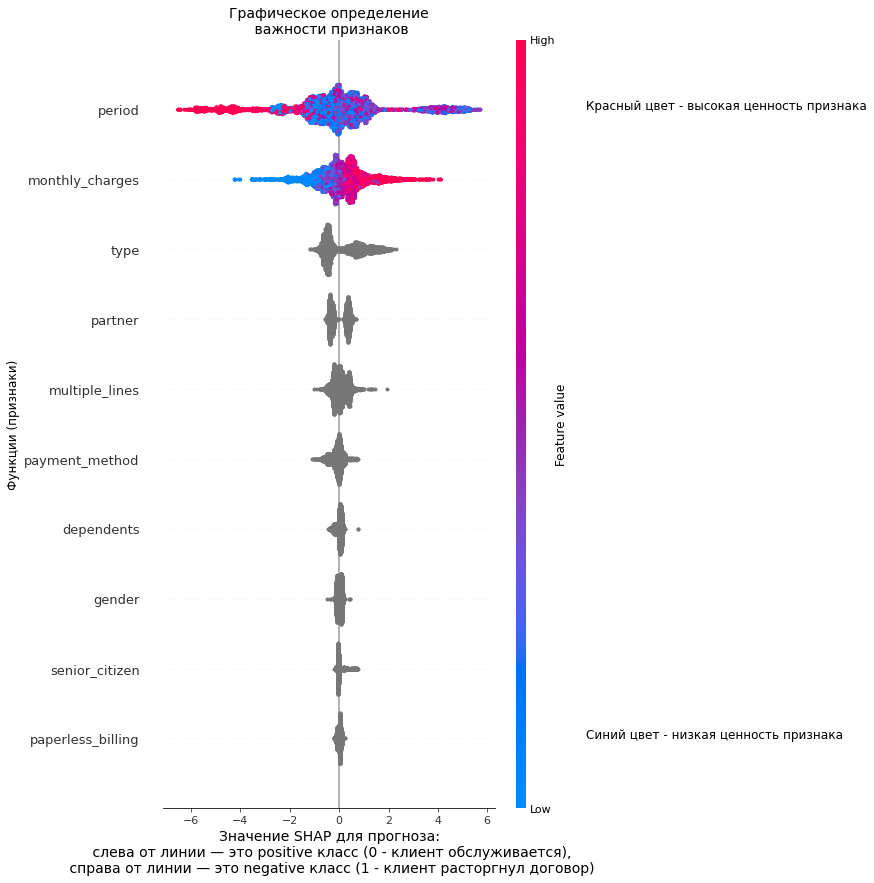

In [336]:
model = model_cbc.best_estimator_
explainer = shap.TreeExplainer(model).shap_values(features_train)
shap.summary_plot(explainer, features_train,
                      max_display=25, plot_size=True, show=False)
plt.title(u"Графическое определение\n важности признаков", fontsize=14)
plt.xlabel(u"Значение SHAP для прогноза:\n слева от линии — это positive класс (0 - клиент обслуживается),\
\n справа от линии — это negative класс (1 - клиент расторгнул договор)", fontsize=14)
plt.ylabel('Функции (признаки)', fontsize=12)
plt.text (10, 9, 'Красный цвет - высокая ценность признака', fontsize=12)
plt.text (10, 0, 'Синий цвет - низкая ценность признака', fontsize=12)
plt.show();

Читается график следующим образом:  
чем толще линия на графике, тем больше таких точек наблюдения,  
чем краснее точки на графике, тем выше значения признака. 

На этой диаграмме ось X обозначает значение SHAP, а ось Y отображает все функции. Каждая точка на диаграмме - это одно значение SHAP для прогноза и функции. Красный цвет означает более высокую ценность объекта. Синий означает меньшую ценность функции. Мы можем получить общее представление о влиянии направленности объектов на основе распределения красных и синих точек.

**Из приведенной выше диаграммы мы можем сделать следующие выводы:  
Чем выше значение «period» (длительность контракта), тем больше вероятность, что клиент останется.  
Чем больше значение «monthly_charges» (ежемесячные траты на услуги по договору), тем тоже высока вероятность, что клиент уйдет.** 

**Важность функции**

Мы можем использовать метод summary_plot с plot_type «bar» для построения графика важности функции.

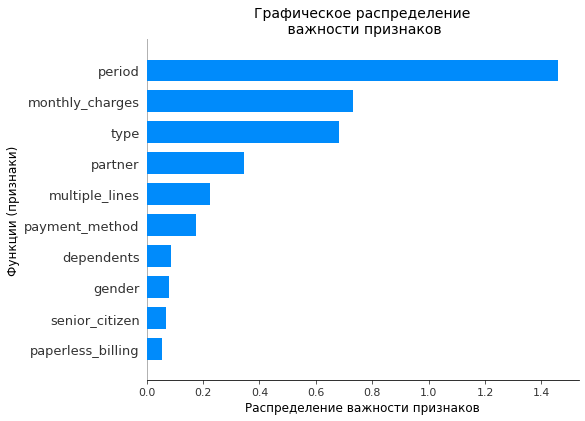

In [337]:
shap.summary_plot(explainer, features_train, plot_type='bar', show=False)
plt.title(u"Графическое распределение\n важности признаков", fontsize=14)
plt.xlabel('Распределение важности признаков', fontsize=12)
plt.ylabel('Функции (признаки)', fontsize=12)
plt.show();

**Из гистограммы важности функции видим, что в первую тройку входят признаки по важности:**  
1. **"period"** - длительность договора (контракта), 
2. **"monthly_charges"** - ежемесячные траты на услуги по договору,
3. **"type"** - тип оплаты (ежемесячный, предоплата на 1 год, предоплата на 2 года).

**Промежуточный итог:**   
1. Мы объединили датасеты в один общий датасет, обработали пропуски.  
2. Сгенерировали корреляционную матрицу признаков (используя библиотеку "phik").   
3. Построили тепловую карту корреляции.   
Обнаружили сильную корреляцю признаков в следующих парах:   
Значение "1": "automatic"-"payment_method"(не удивительно, ведь я "вытянул" новый признак из признака "payment_method"),  
Значение "0.85": "period" - "total_charges" (тоже вполне логично, чем дольше пользуется клиент услугами заказчика, тем больше он тратит денег на услуги),  
Значения "0.81-0.92": "monthly_charges"-"internet_service" (со вложенными услугами) (тоже логично, чем больше интернет услуг у клиента подключено, тем больше ежемесячных трат на услуги у него по договору).  
Удалил признаки:   
"automatic" - я его создавал как новый признак, но оказалось он создает мультиколлинеарность с признаком "payment_method",  
"internet_service" (со вложенными услугами), так как эти признаки в связке с целевым признаком имеют значения коллинеарности в диапазоне от 0,05 до 0,09, а у признака "monthly_charges" значение коллинеарности с целевым признаком равно 0,23 (этот признак оставляем, он больше),  
"total_charges", так как этот признак в связке с целевым признаком имеет значение коллинеарности в размере 0,3, а у признака "period" значение коллинеарности равно 0,37 (этот признак оставляем, он больше).  
В конечном итоге добились значений коэффициентов кореляции между предикторами теперь значения не более 0,8.  
4. Подготовил данные для обучения модели "LogisticRegression" (Логистическая регрессия). Использовал энкодер "OneHotEncoder". Обучил модель "LogisticRegression" (Логистическая регрессия).
5. Подготовил данные для обучения моделей "RandomForestClassifier" (Случайный лес) и "DecisionTreeClassifier" (Дерево решений). Преобразовал категориальные признаки при помощи техники Ordinal Encoding. Обучил модели "RandomForestClassifier" (Случайный лес) и "DecisionTreeClassifier" (Дерево решений).
6. Подготовил данные для обучения модели градиентного бустинга "CatBoostClassifier". Так как эта модель умеет работать с категориальными признаками, подготовил данные без кодировки категориальных признаков. Обучил модель градиентного бустинга "CatBoostClassifier". 
7. Составил сводную таблицу полученных результатов обучения моделей. Выявил наихудшую метрику AUC-ROC у модели 'LogisticRegression' (Логистическая регрессия), равной 0.744, и наилучшую метрику AUC-ROC у модели градиентного бустинга 'CatBoostClassifier', равную 0.927, которая удовлетворила условию поставленной задачи: достичь показателя AUC-ROC >= 0.85.  
8. Построил матрицу ошибок. Машинным и ручным способом определил метрику accuracy равной 0,936 (Сравнение машинного и ручного расчета значения метрики accuracy сделал для интерпретации матрицы ошибок).  
9. Оценил важность признаков лучшей модели при помощи библиотеки SHAP. Определил следующие выводы: Чем выше значение «period» (длительность контракта), тем больше вероятность, что клиент останется. Чем больше значение «monthly_charges» (ежемесячные траты на услуги по договору), тем высока вероятность, что клиент уйдет.   
10. Определил важность функции при использовании метода summary_plot с plot_type «bar» при помощи графика важности функции.  
Из гистограммы важности функции определил первую тройку признаков по важности: "period" - длительность договора (контракта), "monthly_charges" - ежемесячные траты на услуги по договору, "type" - тип оплаты (ежемесячный, предоплата на 1 год, предоплата на 2 года).

**Отчёт**

**1. Нам была поставлена задача научиться прогнозировать отток клиентов из компании «Ниединогоразрыва.ком». Чтобы выяснить, если пользователь запланирует уйти и расторгнуть договор на услуги связи, ему будут предложены промокоды и специальные условия. Так как удержание действующего клиента обойдется компании дешевле, чем найти нового клиента.**  

**При работе над проектом использовали следующие ключевые шаги:**  
1.1.	Загрузка и исследование данных (обзор размера набора данных, типов переменных, наличия пропущенных значений, дубликатов).  
1.2.	Поиск аномалии данных, которые могут исказить наши выводы, предпринятые меры для их коррекции.  
1.3.	Создание новых признаков, целевого признака.  
1.4.	Отбор признаков.  
1.5.	Оценка дисбаланса классов, комментарии.  
1.6.	Подготовка итоговой таблицы, объединение данных.  
1.7.	Исследование корреляции признаков.  
1.8.	Анализ распределения признаков.  
1.9.	Для исследования выбирали четыре модели машинного обучения: Модель 'LogisticRegression' (Логистическая регрессия), Модель 'RandomForestClassifier' (Случайный лес), Модель 'DecisionTreeClassifier' (Дерево решений), Модель градиентного бустинга 'CatBoostClassifier'.   
1.10.  Для каждого типа модели создали копию подготовленного набора данных, разбиваем на обучающую и тестовую выборку в соотношении 3:1, подбираем необходимые кодировщики для преобразования категориальных данных, проводим масштабирование числовых данных.   
1.11. Подобрали гиперпараметры, оценили модели на кросс-валидации.   
1.12. Выбирали лучшую модель по метрике AUC-ROC, оценили её на тестовой выборке.   
1.13. Провели анализ и интерпретация матрицы ошибок.   
1.14. Провели анализ и интерпретацию важности признаков.   

**2. Анализ соответствия фактической работы запланированным шагам.   
В завершении процесса работы по подбору лучшей модели машинного обучения для прогнозирования оттока клиентов из компании «Ниединогоразрыва.ком» следует отметить, что фактически выполненные шаги соответствуют запланированным шагам.**   

**3. Рефлексия над сложностями и описание путей их решения.**

3.1. При подготовке данных выяснилось, что после преобразования значений в признаке "TotalCharges" на тип "float64" оказалось не 7043 значений, а только 7032. Причем в начальном датасете во всех признаках не было найдено пропущенных значений. Возможно эти 11 пропущенных значений, выявленных после обработки датасета, с типом "object" имели значения пробела или нескольких пробелов, то есть по факту не имели числовых значений. Из выборки начального датасета наблюдаем следующее:  
- зрительно значения в признаке "TotalCharges" пустые,  
- в признаке "BeginDate" во всех 11 строках дата указана "01 февраля 2020 года" (дата актуальности датасета).  
То есть вероятнее всего числовые значения в признаке "TotalCharges" отсутствовали ввиду того, что клиенты заключили договор с заказчиком в день выгрузки датасета.  

**В конечном итоге заменили пустые значения в этих строках в признаке "TotalCharges" на ноль.**

3.2. При генерации корреляционной матрицы признаков (используя библиотеку "phik") и построения тепловой карты корреляции определили сильную корреляцию признаков в следующих парах:  
Значение "1": "automatic"-"payment_method"(не удивительно, ведь я "вытянул" новый признак из признака "payment_method"),  
Значение "0.85": "period" - "total_charges" (тоже вполне логично, чем дольше пользуется клиент услугами заказчика, тем больше он тратит денег на услуги),  
Значения "0.81-0.92": "monthly_charges"-"internet_service" (со вложенными услугами) (тоже логично, чем больше интернет услуг у клиента подключено, тем больше ежемесячных трат на услуги у него по договору).  

**Проблему решили путем удаления признаков:**  
"automatic" - я его создавал как новый признак, но оказалось он создает мультиколлинеарность с признаком "payment_method",  
"internet_service" (со вложенными услугами), так как эти признаки в связке с целевым признаком имеют значения коллинеарности в диапазоне от 0,05 до 0,09, а у признака "monthly_charges" значение коллинеарности с целевым признаком равно 0,23 (этот признак оставляем, он больше).  
"total_charges", так как этот признак в связке с целевым признаком имеет значение коллинеарности в размере 0,3, а у признака "period" значение коллинеарности равно 0,37 (этот признак оставляем, он больше).   

**В конечном итоге добились значений коэффициентов кореляции между предикторами теперь значения не более 0,8.**

**4. Краткое описание предобработки данных.**  

Загрузив наборы данных, мы выяснили, что они состоят из 4 таблиц:   
1) contract_new.csv — информация о договоре (состоящее из 8 колонок и 7043 строк);   
2) personal_new.csv — персональные данные клиента (состоящее из 5 колонок и 7043 строк);    
3) internet_new.csv — информация об интернет-услугах (состоящее из 8 колонок и 5517 строк);   
4) phone_new.csv — информация об услугах телефонии (состоящее из 2 колонок и 6361 строк).   

Получается полный набор перечня клиентов (по коду клиента - customerID) есть в первых двух таблицах (информациях о договорах и персональных данных клиентов), а в третьей и четвертой таблицах (информации об интернет-услугах и об услугах телефонии)  перечень клиентов не полный, что не удивительно, так как кто-то пользуется только интернетом, кто-то только телефонией, а кто-то тем и другим.   
Исследовали данные во всех 4 таблицах (типы переменных, наличия пропущенных значений, дубликатов).   
Изначально нам не предоставлен целевой признак – «клиент ушёл»/«клиент остался», но мы его определяем через признак «EndDate» (дата окончания пользования услугами), и добавляем в первую таблицу.   

Наблюдаем сильный дисбаланс классов в целевом признаке.     

Построим гистограмму распределения клиентов (оставшиеся - 0, ушедшие - 1).

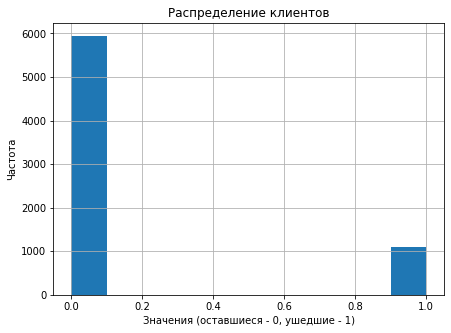

In [338]:
plt.figure(figsize = (12,6))
data_contract_copy['client_left'].hist(figsize=(7,5))
plt.title('Распределение клиентов')
plt.xlabel('Значения (оставшиеся - 0, ушедшие - 1)')
plt.ylabel('Частота');

**Количественное и процентное соотношение дисбаланса:   
клиент остался - 84.37% (количество – 5942),   
клиент ушел - 15.63% (количество – 1101).**   

Также дисбаланс классов наблюдаем на некоторых других признаках в разных таблицах, например в признаках:   
'Type' (клиентов, которые предпочитают ежемесячный способ оплаты больше, реже на год или два года);   
'SeniorCitizen' (клиентов пенсионного возраста небольшое количество);   
'Dependents' (клиентов с иждивенцами не много).   

Но так как метрика AUC-ROC для анализа моделей нечувствительна к дисбалансу, ничего с этим с дисбалансом не делаем, то есть на наборе данных не применяем методы увеличения выборки, уменьшения выборки, изменения порога классификации.   

Также оказалось, что 11 клиентов заключили договор с заказчиком в день выгрузки базы данных, и в столбце  "TotalCharges" (всего потрачено денег на услуги) оказались пустые строки, которых изначально мы не обнаружили, так как значения в этом столбце имели тип данных «object». В конечном итоге заменили пустые значения в этих строках в признаке "TotalCharges" на ноль.   

Выделил новый признак: период в днях, когда клиент пользовался услугами заказчика на момент 01 февраля 2020 года.  
Удалил признаки "BeginDate и "EndDate" с целью избежать утечки данных при обучении модели в будущем.  

**5. Определили итоговый список признаков для обучения моделей:**   

**'type'** - тип оплаты: ежемесячный, годовой и тд,  
**'paperless_billing'** - электронный платёжный документ,  
**'payment_method'** - способ оплаты,  
**'gender'** - пол клиента,  
**'senior_citizen'** - наличие пенсионного статуса по возрасту,  
**'partner'** - наличие супруга(и),  
**'dependents'** -  наличие иждевенцев,  
**'multiple_lines'** - наличие возможности ведения параллельных линий во время звонка.  

Для преобразования категориальных признаков в наборе данных при обучении модели **"LogisticRegression" (Логистическая регрессия)** использовал энкодер "OneHotEncoder" и функцию StandardScaler() для масштабирования числовых признаков.  

Для преобразования категориальных признаков в наборе данных при обучении моделей **"RandomForestClassifier" (Случайный лес) и "DecisionTreeClassifier" (Дерево решений)** использовал технику «Ordinal Encoding» и функцию StandardScaler() для масштабирования числовых признаков.  

При обучении модели градиентного бустинга **"CatBoostClassifier"** использовал внутренний кодировщик (с параметром "cat_features" для обработки категориальных признаков) и функцию StandardScaler() для масштабирования числовых признаков.

**6. Составил сводную таблицу полученных результатов обучения моделей на кросс-валидации.**   
Измерим значение AUC-ROC Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»). Это новая метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5.  

In [339]:
df_simple = [[grid_lr.best_score_.round(3)],
        [model_forest_grid.best_score_.round(3)],
        [model_dtc.best_score_.round(3)],
        [model_cbc.best_score_.round(3)]]
model_simple = ["Модель 'LogisticRegression' (Логистическая регрессия)" , "Модель 'RandomForestClassifier' (Случайный лес)",\
                  "Модель 'DecisionTreeClassifier' (Дерево решений)", "Модель градиентного бустинга 'CatBoostClassifier'", ]
pd.DataFrame(data = df_simple, index = model_simple, columns = ["Метрика AUC-ROC"])

,Метрика AUC-ROC
Модель 'LogisticRegression' (Логистическая регрессия),0.744
Модель 'RandomForestClassifier' (Случайный лес),0.828
Модель 'DecisionTreeClassifier' (Дерево решений),0.795
Модель градиентного бустинга 'CatBoostClassifier',0.927


**7. Выявил наихудшую метрику AUC-ROC у модели 'LogisticRegression' (Логистическая регрессия)**, равной 0.744, и **наилучшую метрику AUC-ROC у модели градиентного бустинга 'CatBoostClassifier'**, равную 0.927, которая удовлетворила условию поставленной задачи: достичь показателя AUC-ROC >= 0.85.   
Наилучшие гиперпараметры модели градиентного бустинга 'CatBoostClassifier': {'iterations': 1000, 'learning_rate': 0.2, 'max_depth': 3}   

**8. Итоговая метрика на тестовой выборке лучшей модели (AUC-ROC и Accuracy).**  
На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика AUC-ROC = 0.935.  
На тестовой выборке у модели градиентного бустинга 'CatBoostClassifier' метрика Accuracy = 0.936.  

**9. Построил матрицу ошибок.** 

In [340]:
# передадим матрице ошибок тестовые и прогнозные значения
# когда клиент расторг договор с заказчиком - это положительный класс
model_matrix = confusion_matrix(target_test, predictions_test_2, labels = [1,0])
 
# для удобства создадим датафрейм, добавим подписи к столбцам и строкам через параметры columns и index
# столбец - это прогноз, строка - фактическое значение (0 - клиент остался, 1 - клиент расторг договор)
model_matrix_df = pd.DataFrame(model_matrix, columns = ['Прогноз "остался"', 'Прогноз "ушёл"'], index = ['Факт "остался"', \
                                                                                                         'Факт "ушёл"'])
model_matrix_df

,"Прогноз ""остался""","Прогноз ""ушёл"""
"Факт ""остался""",194,90
"Факт ""ушёл""",22,1455


Как мы видим, модель допустила 22 + 90 = 112 ошибок:

22 раза модель прогнозировала, что клиент "остался", хотя на самом деле это не так.  
Кроме того, 90 раз модель прогнозировала, что клиент "ушел", но он "остался".   
Остальные значения предсказаны верно.  

Доля правильно предсказанных значений называется accuracy. Чтобы ее посчитать, мы берем те значения, которые предсказаны верно (TP + TN) и делим на общее количество прогнозов.   
Рассчитал вручную accuracy или долю правильных прогнозов:   
(194+1455)/(194+1455+90+22) = 0,936   
Машинным и ручным способом определил метрику accuracy равной 0,936 (Сравнение машинного и ручного расчета значения метрики accuracy сделал для интерпретации матрицы ошибок).   
**Итак, наша модель предсказывает верный результат в 93,6% случаев.**   

**10. Оценил важность признаков лучшей модели при помощи библиотеки SHAP.**   

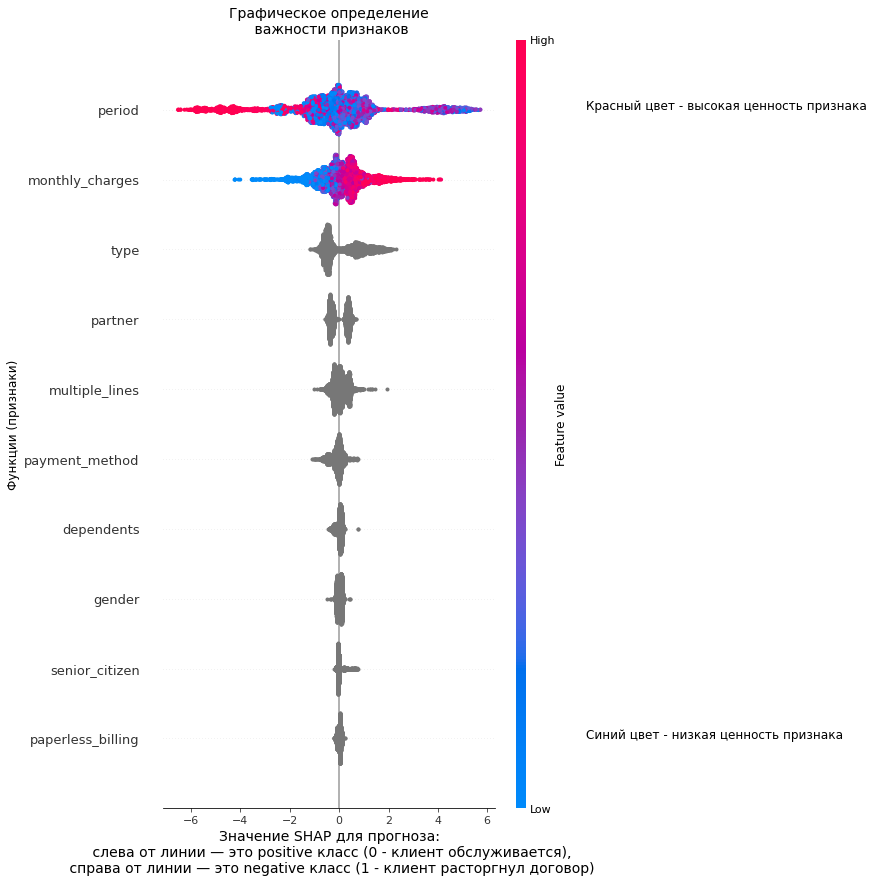

In [341]:
model = model_cbc.best_estimator_
explainer = shap.TreeExplainer(model).shap_values(features_train)
shap.summary_plot(explainer, features_train,
                      max_display=25, plot_size=True, show=False)
plt.title(u"Графическое определение\n важности признаков", fontsize=14)
plt.xlabel(u"Значение SHAP для прогноза:\n слева от линии — это positive класс (0 - клиент обслуживается),\
\n справа от линии — это negative класс (1 - клиент расторгнул договор)", fontsize=14)
plt.ylabel('Функции (признаки)', fontsize=12)
plt.text (10, 9, 'Красный цвет - высокая ценность признака', fontsize=12)
plt.text (10, 0, 'Синий цвет - низкая ценность признака', fontsize=12)
plt.show();

Определил следующие выводы:   
**Чем выше значение «period» (длительность контракта), тем больше вероятность, что клиент останется.   
Чем больше значение «monthly_charges» (ежемесячные траты на услуги по договору), тем высока вероятность, что клиент уйдет.**  

**Определил важность функции при использовании метода summary_plot с plot_type «bar» при помощи графика важности функции.**   

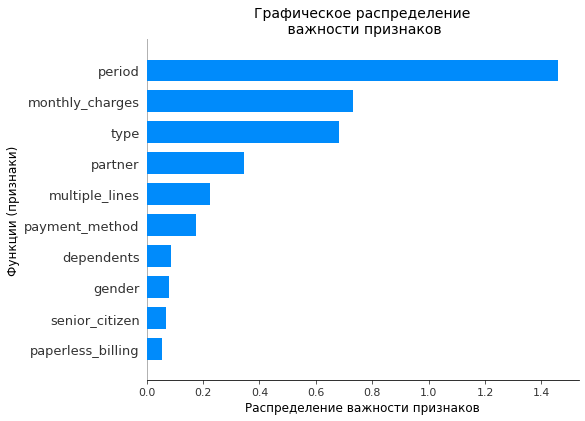

In [342]:
shap.summary_plot(explainer, features_train, plot_type='bar', show=False)
plt.title(u"Графическое распределение\n важности признаков", fontsize=14)
plt.xlabel('Распределение важности признаков', fontsize=12)
plt.ylabel('Функции (признаки)', fontsize=12)
plt.show();

**Из гистограммы важности функции определил первую тройку признаков по важности:   
"period" - длительность договора (контракта),   
"monthly_charges" - ежемесячные траты на услуги по договору,   
"type" - тип оплаты (ежемесячный, предоплата на 1 год, предоплата на 2 года).**  

**Вывод:**     
С задачей прогнозирования оттока клиентов из компании «Ниединогоразрыва.ком» с требуемой метрикой 
показателя AUC-ROC >= 0.85 справилась **модель градиентного бустинга 'CatBoostClassifier'** со следующими показателями: на кросс-валидации метрика AUC-ROC = 0,927, на тестовой выборке метрика **AUC-ROC = 0,935.** Полученные значения AUC-ROC очень хорошие, (это новая метрика качества, которая изменяется от 0 до 1, AUC-ROC случайной модели равна 0.5).   
Так же не плохие показатели метрики **Accuracy = 0,936** на тестовой выборке, то есть наша **модель предсказывает верный результат в 93,6% случаев.**    
Определили важность признаков лучшей модели при помощи библиотеки SHAP. **(Чем выше значение «period» (длительность контракта), тем больше вероятность, что клиент останется. Чем больше значение «monthly_charges» (ежемесячные траты на услуги по договору), тем высока вероятность, что клиент уйдет).**   
Определили важность функции при использовании метода summary_plot при помощи графика важности функции: **(первая тройка признаков по важности: "period" - длительность договора (контракта), "monthly_charges" - ежемесячные траты на услуги по договору, "type" - тип оплаты (ежемесячный, предоплата на 1 год, предоплата на 2 года)).**